# Analyzing Funding for Indian Startups from 2015 to 2020
**Pranav Shikarpur**

## Introduction
In this project, I want to analyze the funding / investments that have gone into startups in the past few years. I want to see the trends that might exist between startup industry vertical and funding, the startup investment space in India, and the types of investments that happen most often, etc.

## Background Information
India is the 3rd largest startup ecosystem in the world after US and China. India, country with the fastest growing population and the fastest growing economy, is a very interesting country to look at in terms of problems being solved. Since India is a developing country, the problems in India are very different from the problems in the US. This implies that although there is a far greater opportunity for finding problems to solve, they also require very different approaches to solve when compared to problem solving in the US.

A startup is just an organization of people that are working together to solve a particular problem. This is what attracts startups to be formed in countries in India that have many problems and many highly skilled / educated engineers and scientists to solve them. In 2018, India reported to have over 50,000 startups which implies about 2-3 tech startups are born in India every day.

All of these pieces put together, makes the Indian startup ecosystem a great data science project. Startup investments is very important for startups more importantly tech startups to sustain and grow. Furthermore, this project analyses startup investments from venture capital funds, angel investors, and other types of investers from the year 2015 to 2020.

### Personal Motivations
In 2020, I started a education tech startup in India called [Strive](https://strive.social/). We raised our seed round of funding from a venture capital fund called 100x.vc. After working with them, I got very curious to understand how the startup investment space works in India, this motivated me to do this project.

### Libraries Used
- Pandas: Used to build the dataframe which helps in organizing data.
- Numpy: Used to do easy computations on our data.
- MatplotLib: Used to plot graphs and charts.
- Seaborn: Used to plot statistical visualizations. Runs on top off Matplotlib.
- Datetime: Built-in python library to work with dates and times.

In [178]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## About the Data
This dataset contains information about Indian startups fundraising rounds from 2015 - 2020. The dataset contains 3044 funding rounds of 2459 startups. This dataset also contains information such as date of funding, industry vertical and subvertical of startup, amount raised, investment type and investors in the funding round.

### Data Source
I got this dataset from [Kaggle](https://kaggle.com). Dataset Source [kaggle.com/sudalairajkumar/indian-startup-funding](https://www.kaggle.com/sudalairajkumar/indian-startup-funding).

The creator of this dataset consolidated the data from a Tech, startups blog that publishes Startup funding data publicly - [trak.in](https://trak.in/)

### Data Loading and View
The data is loaded from the csv file extracted from the source listed above and is loaded as a csv into a datafram using pandas `read_csv` function.

Let's look at the first few rows of it to make sure it looks fine.

In [156]:
df1 = pd.read_csv('./startup_funding.csv')
df1.head()

Sr No Date dd/mm/yyyy                  Startup Name    Industry Vertical  \
0      1      09/01/2020                        BYJU’S               E-Tech   
1      2      13/01/2020                        Shuttl       Transportation   
2      3      09/01/2020                     Mamaearth           E-commerce   
3      4      02/01/2020  https://www.wealthbucket.in/              FinTech   
4      5      02/01/2020                        Fashor  Fashion and Apparel   

                             SubVertical City  Location  \
0                             E-learning      Bengaluru   
1              App based shuttle service        Gurgaon   
2  Retailer of baby and toddler products      Bengaluru   
3                      Online Investment      New Delhi   
4            Embroiled Clothes For Women         Mumbai   

              Investors Name       InvestmentnType Amount in USD Remarks  
0    Tiger Global Management  Private Equity Round  20,00,00,000     NaN  
1  Susquehanna Growth Equity              Series C     80,48,394     NaN  
2      Sequoia Capital India              Series B   1,83,58,860     NaN  
3             Vinod Khatumal          Pre-series A     30,00,000     NaN  
4    Sprout Venture Partners            Seed Round     18,00,000     NaN

### Let's clean up the dataset
First I will start by converting all the dates of funding from a `string` to a `datetime` value to make it easier to sort and group further on.

In [157]:
# Removing unreadable dates
for idx, row in df1.iterrows():
    
    if(len(row["Date dd/mm/yyyy"]) != 10):
        print(row["Date dd/mm/yyyy"])
        # Correcting the ones we know we can correct.
        if row["Date dd/mm/yyyy"] == "05/072018":
            df1.at[idx, "Date dd/mm/yyyy"] = "05/07/2018"
        elif row["Date dd/mm/yyyy"] == "01/07/015":
            df1.at[idx, "Date dd/mm/yyyy"] = "01/07/2015"
        elif row["Date dd/mm/yyyy"] == "22/01//2015":
            df1.at[idx, "Date dd/mm/yyyy"] = "22/01/2015"
        else:
            df1.at[idx, "Date dd/mm/yyyy"] = None
        
df1.loc[df1["Date dd/mm/yyyy"].isnull()==True]

05/072018
01/07/015
\\xc2\\xa010/7/2015
22/01//2015


Sr No Date dd/mm/yyyy                  Startup Name  \
2606   2607            None  \\xc2\\xa0Infinity Assurance   

                                      Industry Vertical SubVertical  \
2606  \\xc2\\xa0Warranty Programs Service Administra...         NaN   

           City  Location                  Investors Name InvestmentnType  \
2606  \\xc2\\xa0New Delhi  \\xc2\\xa0Indian Angel Network    Seed Funding   

          Amount in USD Remarks  
2606  \\xc2\\xa0600,000     NaN

In [158]:
# Since there is only 1 row with meaningless data, we can remove it.
df1.drop(df1.loc[df1["Date dd/mm/yyyy"].isnull()==True].index, inplace=True)

Now that we have cleaned up data that is unparsable, let's now convert the strings into datetime objects. This is done using pandas handy `to_datetime` function that converts a column of strings into datetime objects.

I have to pass the `dayfirst` parameter in the `to_datetime` function since this dataset contains dates in the `dd/mm/yyyy` format.

In [159]:
df1["Date dd/mm/yyyy"] = pd.to_datetime(df1["Date dd/mm/yyyy"], dayfirst=True)

# Check whether it is a datetime type using the python built-in type function.
type(df1["Date dd/mm/yyyy"][0])

pandas._libs.tslibs.timestamps.Timestamp

Let's reaname a few columns to make the dataframe easier to work with.
* Delete `Sr No` column since we already have the default pandas `id` column.
* `Date dd/mm/yyyy` -> `date`
* `Startup Name` -> `startup`
* `Industry Vertical` -> `vertical`
* `SubVertical` -> `subvertical`
* `Investors Name` -> `investors_name`
* `City Location` -> `city`
* `InvestmentnType` -> `investment_type`
* `Amount in USD` -> `amount`
* `Remarks` -> `remarks`

In [160]:
# Drop Sr No column
df1 = df1.drop(["Sr No"], axis=1)

# Rename Columns
df1.columns = ["date", "startup", "vertical","sub_vertical", "city", "investors_name", "investment_type", "amount", "remarks"]

Well, we're not yet done.

We need to convert the amount column from a string type to an integer type.
First we need to remove all the `,`'s in the strings so that we can use the python built-in `int` function which will help us convert a number string into an integer type.

Since most startups usually raise venture capital from investors, sometimes they do not disclose the funding amount. This is usually done for stealth startups and in many other scenarios.
Furthermore, we want to remove the word `undisclosed` present for some of the startups since it doesn't help us too much with our analysis.

In [161]:
# Removing all commas out of amount strings
df1["amount"] = df1["amount"].str.replace(",", "")
df1["amount"] = df1["amount"].str.replace("+", "")

# Making all the undisclosed funding rounds equal to the string of number 0
df1.loc[df1["amount"].isin(["undisclosed", "unknown", "Undisclosed"]), "amount"] = "0"
# Assiging unreadable amounts from the dataset to string 0
df1.loc[df1["amount"].str.contains('\\\\') == True, "amount"] = "0"
# Assigning all rows with null type funding round to 0
df1.loc[df1["amount"].isnull() == True, "amount"] = "0"

df1["amount"] = df1["amount"].astype(np.float64)

### Investors are concatenated in strings 😢
**Context and Fun Facts**:
- Usually during every startup investment round there are multiple investors that put in small amounts and there is one lead investor who puts in more than 50% of the total amount into that particular round.
- For example, if a company is raising `$10,000,000`. It might need to approach multiple investors, but have 1 investor (the lead investor) in those multiple investors who is willing to invest `$5,00,000` in that round of funding. That's why you hear startup founders going out to pitching to about 50-100 investors before they can close a  round of funding.
- This lead investor is usually responsible for helping the company raise the next round in the future and also work with the startup very closely to help the startup grow.


Unfortunately, all the investor names for each startups in this dataset are just concatenated strings with each investor separated with a `,`, `and`, or `&` operators.

The concatonated string of investors also have spaces between the operators.

In [162]:
# As we can see below, all the investor_names in this dataset are a concatonated strings which contain a list of investors.
list(df1["investors_name"].unique())

['Tiger Global Management',
 'Susquehanna Growth Equity',
 'Sequoia Capital India',
 'Vinod Khatumal',
 'Sprout Venture Partners',
 'Chiratae Ventures',
 'Ant Financial',
 'Sathguru Catalyzer Advisors',
 'Ping An Global Voyager Fund',
 'Mumbai Angels, Ravikanth Reddy',
 'SAIF Partners, Spring Canter Investment Ltd.',
 'Paytm, NPTK, Sabre Partners and Neoplux',
 'Vertex Growth Fund',
 nan,
 'Ruizheng Investment',
 'Manipal Education and Medical Group (MEMG)',
 'SoftBank Vision Fund',
 'Sequoia, CapitalG, Accel',
 'Sauce.vc, Rainforest Ventures',
 'Prime Venture Partners, LetsVenture, PS1 Venture and GlobalLogic co-founder Rajul Garg',
 'RB Investments',
 'DG Daiwa Ventures, DG Incubation',
 'Trifecta Capital Advisors',
 'FinTech',
 'Dream Incubator',
 'Altimeter Capital, Sutter Hill Ventures',
 'Startup Buddy',
 'Amour Infrastructure',
 'Ackermans & van Haaren, HealthQuad, Rebright Partners, Toppan Printing',
 'Matrix Partners, Stellaris Venture Partners, Kalaari Capital',
 'IAN Fund an

### Extracting List of Investors:
1. Remove the operators and spaces in these concatenated strings.
2. Split the investors into a list of investors.
3. Add it to a new column in the dataframe.
4. Also extract a new list of investors that are unique

In [163]:
investor_list: list = []
unique_investor_list = []
investors_names_list: list = []

df1["investors_name"] = df1["investors_name"].str.replace("\\\\xc2\\\\xa0", "")
df1["investors_name"] = df1["investors_name"].str.replace("\\xc2\\xa0", "")
    
true_investor_df = df1.loc[df1["investors_name"].isnull() == False]

for idx, row in df1.iterrows():
        investor = row["investors_name"]
        if type(investor) == str:
            investor = investor.replace('&', ',')
            investor = investor.replace('and', ',')
            investor = investor.replace(', ', ',')
            investor = investor.replace(' ,', ',')
            
            investors_for_startup: list = investor.split(",")
            investor_list.append(investors_for_startup)
            
            investors_names_list.append(np.array(investors_for_startup))
        
        else:
            investors_names_list.append(np.nan)
            
# Add investors as a list of investors.
df1["investors_names_list"] = investors_names_list
        
for investors in investor_list:
    for investor in investors:
        unique_investor_list.append(investor)
        
unique_investor_list = set(unique_investor_list)

df1.head()

date                       startup             vertical  \
0 2020-01-09                        BYJU’S               E-Tech   
1 2020-01-13                        Shuttl       Transportation   
2 2020-01-09                     Mamaearth           E-commerce   
3 2020-01-02  https://www.wealthbucket.in/              FinTech   
4 2020-01-02                        Fashor  Fashion and Apparel   

                            sub_vertical       city  \
0                             E-learning  Bengaluru   
1              App based shuttle service    Gurgaon   
2  Retailer of baby and toddler products  Bengaluru   
3                      Online Investment  New Delhi   
4            Embroiled Clothes For Women     Mumbai   

              investors_name       investment_type       amount remarks  \
0    Tiger Global Management  Private Equity Round  200000000.0     NaN   
1  Susquehanna Growth Equity              Series C    8048394.0     NaN   
2      Sequoia Capital India              Series B   18358860.0     NaN   
3             Vinod Khatumal          Pre-series A    3000000.0     NaN   
4    Sprout Venture Partners            Seed Round    1800000.0     NaN   

          investors_names_list  
0    [Tiger Global Management]  
1  [Susquehanna Growth Equity]  
2      [Sequoia Capital India]  
3             [Vinod Khatumal]  
4    [Sprout Venture Partners]

### Cleaning up unecessary characters in multiple columns
This dataset has unecessary and random characters in the columns such as substrings like `\\xc2\\xa0` which might have accidentally sneaked into the dataset during the data wrangling process.

I did remove these substrings from a few columns on the top, but as I went on, I noticed that there were substrings like this in almost all columns. So, similar to how I have done it above, we will use the python built-in `.replace` function to replace any of these unecessary characters.

Let's start doing this for the city column.

In [164]:
df1["city"].unique()

array(['Bengaluru', 'Gurgaon', 'New Delhi', 'Mumbai', 'Chennai', 'Pune',
       'Noida', 'Faridabad', 'San Francisco', 'San Jose,', 'Amritsar',
       'Delhi', 'Kormangala', 'Tulangan', 'Hyderabad', 'Burnsville',
       'Menlo Park', 'Gurugram', 'Palo Alto', 'Santa Monica', 'Singapore',
       'Taramani', 'Andheri', 'Chembur', 'Nairobi', 'Haryana', 'New York',
       'Karnataka', 'Mumbai/Bengaluru', 'Bhopal',
       'Bengaluru and Gurugram', 'India/Singapore', 'Jaipur', 'India/US',
       'Nagpur', 'Indore', 'New York, Bengaluru', 'California', 'India',
       'Ahemadabad', 'Rourkela', 'Srinagar', 'Bhubneswar', 'Chandigarh',
       'Delhi & Cambridge', 'Kolkatta', 'Kolkata', 'Coimbatore',
       'Bangalore', 'Udaipur', nan, 'Ahemdabad', 'Bhubaneswar',
       'Ahmedabad', 'Surat', 'Goa', 'Uttar Pradesh', 'Nw Delhi', 'Gaya',
       'Vadodara', 'Trivandrum', 'Missourie', 'Panaji', 'Gwalior',
       'Karur', 'Udupi', 'Kochi', 'Agra', 'Bangalore/ Bangkok', 'Hubli',
       'Kerala', 'Kozhiko

Notice how the bottom few elements in the list have some random chatacters.

Additionally, some cities for some startups are different spellings although they are based in the same city.
**Fun Fact** - During British Rule (before India gained independence), a lot of the Indian city names were changed to make them easier to spell in English. Hence some cities like Bengaluru (Original Name) are written as Bangalore (British Name).

I'm going to change the names to the original ones, so we have lesser duplicates.

In [165]:
df1["city"] = df1["city"].str.replace("\\\\\\\\xc2\\\\\\\\xa0", "")
df1["city"].unique()

df1["city"] = df1["city"].str.replace("Bangalore", "Bengaluru")
df1["city"] = df1["city"].str.replace("Kolkatta", "Kolkata")
df1["city"] = df1["city"].str.replace("Gurgaon", "Gurugram")

df1["city"].unique()

array(['Bengaluru', 'Gurugram', 'New Delhi', 'Mumbai', 'Chennai', 'Pune',
       'Noida', 'Faridabad', 'San Francisco', 'San Jose,', 'Amritsar',
       'Delhi', 'Kormangala', 'Tulangan', 'Hyderabad', 'Burnsville',
       'Menlo Park', 'Palo Alto', 'Santa Monica', 'Singapore', 'Taramani',
       'Andheri', 'Chembur', 'Nairobi', 'Haryana', 'New York',
       'Karnataka', 'Mumbai/Bengaluru', 'Bhopal',
       'Bengaluru and Gurugram', 'India/Singapore', 'Jaipur', 'India/US',
       'Nagpur', 'Indore', 'New York, Bengaluru', 'California', 'India',
       'Ahemadabad', 'Rourkela', 'Srinagar', 'Bhubneswar', 'Chandigarh',
       'Delhi & Cambridge', 'Kolkata', 'Coimbatore', 'Udaipur', nan,
       'Ahemdabad', 'Bhubaneswar', 'Ahmedabad', 'Surat', 'Goa',
       'Uttar Pradesh', 'Nw Delhi', 'Gaya', 'Vadodara', 'Trivandrum',
       'Missourie', 'Panaji', 'Gwalior', 'Karur', 'Udupi', 'Kochi',
       'Agra', 'Bengaluru/ Bangkok', 'Hubli', 'Kerala', 'Kozhikode', 'US',
       'Siliguri', 'USA', 'Luckn

Now let's do the same for the vertical and sub vertical.

In [166]:
df1["vertical"] = df1["vertical"].str.replace("\\\\\\\\xc2\\\\\\\\xa0", "")
df1["vertical"] = df1["vertical"].str.replace("\\\\\\\\n", "")
df1["vertical"] = df1["vertical"].str.replace("\\\\\\\\xc3\\\\\\\\xa9", "")

df1["sub_vertical"] = df1["vertical"].str.replace("\\\\\\\\xc2\\\\\\\\xa0", "")
df1["sub_vertical"] = df1["vertical"].str.replace("\\\\\\\\n", "")
df1["sub_vertical"] = df1["vertical"].str.replace("\\\\\\\\xc3\\\\\\\\xa9", "")

df1["vertical"].unique()

array(['E-Tech', 'Transportation', 'E-commerce', 'FinTech',
       'Fashion and Apparel', 'Logistics', 'Hospitality', 'Technology',
       'E-Commerce', 'Aerospace', 'B2B-focused foodtech startup',
       'Finance', 'Video', 'Gaming', 'Software', 'Health and wellness',
       'Education', 'Food and Beverage', 'Health and Wellness',
       'B2B Marketing', 'Video Games', 'SaaS', 'Last Mile Transportation',
       'Healthcare', 'Customer Service', 'B2B', 'Consumer Goods',
       'Advertising, Marketing', 'IoT', 'Information Technology',
       'Consumer Technology', 'Accounting', 'Retail',
       'Customer Service Platform', 'Automotive', 'EdTech', 'Services',
       'Compliance', 'Transport', 'Artificial Intelligence', 'Tech',
       'Health Care', 'Luxury Label', 'Waste Management Service',
       'Deep-Tech', 'Agriculture', 'Energy', 'Digital Media', 'Saas',
       'Automobile', 'Agtech', 'Social Media', 'Fintech', 'Edtech', 'AI',
       'Ecommerce', 'Nanotechnology', 'Services Platfo

Let's do the same for the funding round.

**Fun Facts:**
* A startup raises funding to grow 10x faster than it's current pace. (That's why there's a common saying that 9 out of 10 startups fail - because 10x growth is hard!)
* The lifecycle usually starts from:
    * Seed Funding Round -> Usually taken to build the product or gain initial revenue and grow that to a company that is building something customers want.
    * Series A -> Usually raised after the startup has reached a point called product market fit where the market wants the product of that particular startup.
    * Series B - F -> Raised to scale the company to roll in larger revenues and acquire more users.
    * IPO -> If a company is **lucky** (which is a low chance) they can make it a publicly traded company and list on the stock market.
    
    
Anyways coming back 😛, there are some unecessary substrings in the investment_type column.

In [167]:
df1["investment_type"].unique()

array(['Private Equity Round', 'Series C', 'Series B', 'Pre-series A',
       'Seed Round', 'Series A', 'Series D', 'Seed', 'Series F',
       'Series E', 'Debt Funding', 'Series G', 'Series H', 'Venture',
       'Seed Funding', nan, 'Funding Round', 'Corporate Round',
       'Maiden Round', 'pre-series A', 'Seed Funding Round',
       'Single Venture', 'Venture Round', 'Pre-Series A', 'Angel',
       'Series J', 'Angel Round', 'pre-Series A',
       'Venture - Series Unknown', 'Bridge Round', 'Private Equity',
       'Debt and Preference capital', 'Inhouse Funding',
       'Seed/ Angel Funding', 'Debt', 'Pre Series A', 'Equity',
       'Debt-Funding', 'Mezzanine', 'Series B (Extension)',
       'Equity Based Funding', 'Private Funding', 'Seed / Angel Funding',
       'Seed/Angel Funding', 'Seed funding', 'Seed / Angle Funding',
       'Angel / Seed Funding', 'Private', 'Structured Debt', 'Term Loan',
       'PrivateEquity', 'Angel Funding', 'Seed\\\\nFunding',
       'Private\\\\nEqui

In [168]:
df1["investment_type"] = df1["investment_type"].str.replace("\\\\\\\\n", " ")

funding_round_list: list = df1["investment_type"].unique()
for investment_type in funding_round_list:
    if(type(investment_type) == str):
        lower_investment_type = investment_type.lower()
        if (lower_investment_type.__contains__("angel") or lower_investment_type.__contains__("angle")) and lower_investment_type.__contains__("Seed"):
            df1["investment_type"] = df1["investment_type"].str.replace(investment_type, "Seed")
        elif lower_investment_type.__contains__("seed"):
            df1["investment_type"] = df1["investment_type"].str.replace(investment_type, "Seed")
        elif ((lower_investment_type.__contains__("pre") and lower_investment_type.__contains__("series")) and lower_investment_type.__contains__("a")):
            df1["investment_type"] = df1["investment_type"].str.replace(investment_type, "Pre Series A")
        elif lower_investment_type.__contains__("series") and lower_investment_type.__contains__("b"):
            df1["investment_type"] = df1["investment_type"].str.replace(investment_type, "Series B")
        elif lower_investment_type.__contains__("angel"):
            df1["investment_type"] = df1["investment_type"].str.replace(investment_type, "Angel")
    
df1["investment_type"].unique()

array(['Private Equity Round', 'Series C', 'Series B', 'Pre Series A',
       'Seed', 'Series A', 'Series D', 'Series F', 'Series E',
       'Debt Funding', 'Series G', 'Series H', 'Venture', nan,
       'Funding Round', 'Corporate Round', 'Maiden Round', 'Seed Round',
       'Single Venture', 'Venture Round', 'Angel', 'Series J',
       'Venture - Series Unknown', 'Bridge Round', 'Private Equity',
       'Debt and Preference capital', 'Inhouse Funding', 'Debt', 'Equity',
       'Debt-Funding', 'Mezzanine', 'Series B (Extension)',
       'Equity Based Funding', 'Private Funding', 'Angel / Seed',
       'Private', 'Structured Debt', 'Term Loan', 'PrivateEquity',
       'Crowd funding', 'Crowd Funding'], dtype=object)

Yay 🙌

Now that the data is cleaned up, we can start doing analysis on that dataframe.

## Analysis
There are multiple ways we could go about doing this analysis due to the amount of parameters we have. Now that we have a clearner dataset compared to what we got right off the Kaggle website, we could startoff by looking at the top 25 investment rounds.

### Top 25 Funding Rounds
I used seaborn which is a python package that helps you plot your pandas dataframe easily. To sort the dataset, I used the pandas `sort_values` function to sort the dataset based on descending amount value.

In [169]:
amount_sorted_df = df1.sort_values(by=["amount"], ascending=False, ignore_index=True)
top_25_funding_round_list = amount_sorted_df.head(25)

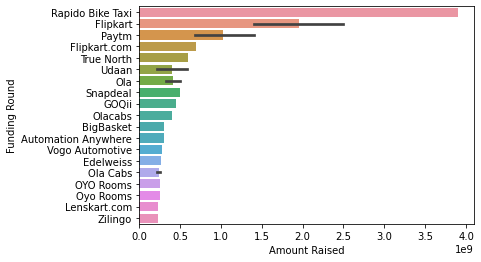

In [172]:
ax = sns.barplot(data=top_25_funding_round_list, y="startup", x="amount")
ax.set(ylabel="Funding Round", xlabel="Amount Raised")

plt.show()

In [175]:
top_25_funding_round_list["investment_type"]

0           Series B
1     Private Equity
2     Private Equity
3     Private Equity
4      Funding Round
5     Private Equity
6     Private Equity
7     Private Equity
8           Series D
9     Private Equity
10    Private Equity
11          Series C
12    Private Equity
13    Private Equity
14    Private Equity
15          Series B
16          Series B
17    Private Equity
18    Private Equity
19    Private Equity
20    Private Equity
21          Series G
22          Series D
23    Private Equity
24    Private Equity
Name: investment_type, dtype: object

As we can see from the above list of investment types for the top 25 companies, we can see that most of these rounds are series fundings or private equity funding.

This is aligns with the general definition with Series and Private Equity funding (Definition [here](https://www.investopedia.com/articles/personal-finance/102015/series-b-c-funding-what-it-all-means-and-how-it-works.asp)) that these rounds usually are raised when a startup is a few years down the line, has good revenue numbers, and wants to scale even more. Furthermore, this explains why the highest investment amounts have come for these rounds.

Additionally, 12 of these 25 startups listed above are unicorns which also explains the large size of funding. "In the venture capital industry, the term unicorn refers to any startup that reaches the valuation of $1 billion." ([source](https://razorpay.com/learn/what-is-a-unicorn-startup/))

### Investment in Indian Startup Trends (2015 - 2020)
According to [this](https://timesofindia.indiatimes.com/business/india-business/india-becomes-third-largest-startup-ecosystem-in-the-world/articleshow/85871428.cms) article, India is supposed to be the 3rd largest startup ecosystem in the world - which is amazing.

Let's see if our dataset can show us similar results.

First let's add a new column which contains the year in which the funding was raised by the startup. For this we will extract the year from the datetime object in the date column of the dataframe.

In [29]:
funding_date_list: np.array = df1["date"]

funding_year_list: list = [x.year for x in funding_date_list]
df1["funding_year"] = funding_year_list

Now let's group all the funding rounds into groups / buckets using the pandas `groupby` function.

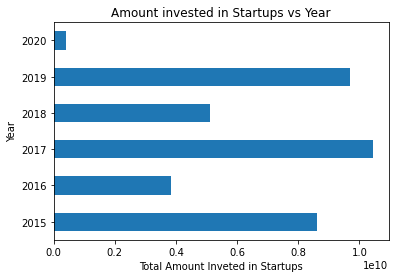

In [52]:
funding_year_list = df1["funding_year"].unique()
# list_of_years: list = [x.year for x in funding_date_list]
ax = df1.groupby(["funding_year"]).amount.sum().plot.barh()
ax.set(ylabel="Year", xlabel="Total Amount Inveted in Startups", title="Amount invested in Startups vs Year")


# ax = sns.barplot(data=startup_funding_by_year, y=funding_year_list, x=startup_funding_by_year)
# ax.set(ylabel="Funding Round", xlabel="Amount Raised")

plt.show()

#### Wait What 😱?

How is the funding each year dynamically changing? According to most the articles and resources on the internet the Indian startups space is supposed to be growing every year.

Well, there are 2 reasons for this:
1. We took all types of investments which includes Series B-F and private equity rounds. However, if we truely want to see the startup space growing we need to look at how many startups are raising angel, seed, and pre-series funding. This is usually considered the most risky forms of investments since this is the point where most startups. Seeing an increase in investment here, would direclty imply investors and VCs having a bigger vision for startups in the future.
    - Additionally, note that startup investments take 5 - 10 years to show a return on investment.
2. We don't have enough data for startups from 2020 in this dataset. If we look closely, we only have 5 startup funding rounds from the year 2020 which makes it hard to see an overall trend in 2020.


#### How do we fix this?

We can fix this by filtering out the dataset before grouping it by year. As we can see below, I have filtered the dataframe into Angel, Seed, and Pre Series A funding rounds. Then I have grouped all the rows by the year the investment was raised.

This would give as a better sense of the startup investment trend in India.

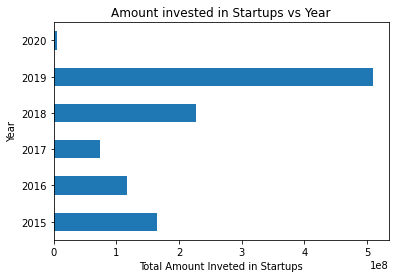

In [58]:
# Filter data set where investment_type = Seed, Angel, or Pre Series A
seed_funding_df = df1.loc[(df1["investment_type"] == "Seed") | (df1["investment_type"] == "Angel") | (df1["investment_type"] == "Pre Series A")]


ax = seed_funding_df.groupby(["funding_year"]).amount.sum().plot.barh()
ax.set(ylabel="Year", xlabel="Total Amount Inveted in Startups", title="Amount invested in Startups vs Year")

plt.show()

As we can see from the above bar graph, the Indian startup ecosystem faced some bad times during the year 2017 as supported by in this [article](https://yourstory.com/2017/12/2017-startup-funding-report/amp); however, it has consistenly been doing well with the increase in the amount of funding in Angel, Seed, and Pre-Series A stage startups from 2017 onwards.

In [89]:
investment_type_countdf = df1["investment_type"].value_counts()

investment_type_countdf

Seed                           1529
Private Equity                 1357
Debt Funding                     25
Series A                         24
Series B                         20
Series C                         14
Series D                         12
Pre Series A                      9
Angel / Seed                      8
Private Equity Round              4
Angel                             3
Venture Round                     2
Equity                            2
Series E                          2
Series F                          2
Corporate Round                   2
Equity Based Funding              1
Private Funding                   1
Crowd Funding                     1
Private                           1
Venture                           1
Series H                          1
Single Venture                    1
Seed Round                        1
Term Loan                         1
Debt and Preference capital       1
Series G                          1
Debt-Funding                

As we can see the maximum amount of investments have gone into seed stage startups and into private equity rounds. This directly aligns with the fact that seed and angel investments are the **riskiest** forms of investment, but have the **highest** reward. Additionally, startup investments by nature are very risky, but private equity investments are less risky since these types of investments are only raised by well established startups with great revenue, traction, and growth.

Hence, we can see the top 2 forms of investment are seed and private equity. Let's plot it out to see how much of the total investments these types of investments account for.

To plot it, I used the matplotlib's `pie` function to be able to plot it.

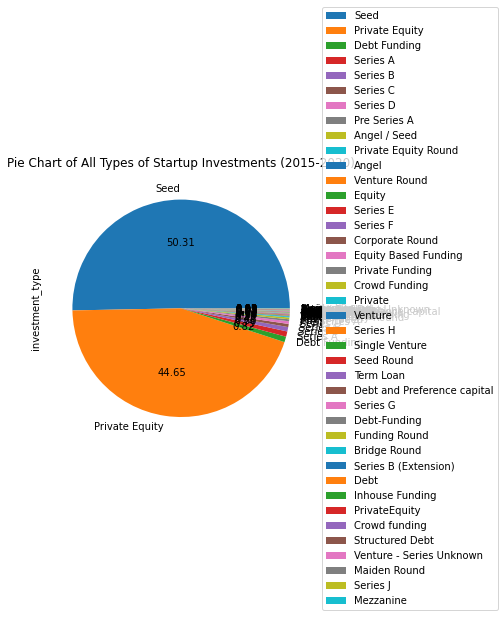

In [90]:
investment_type_countdf = investment_type_countdf.to_frame()
ax = investment_type_countdf.plot.pie(y="investment_type", figsize=(5, 5), autopct='%.2f')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title("Pie Chart of All Types of Startup Investments (2015-2020)")

plt.show()

### Industry Verticals
Now, let's look to see whether there were any particular industry verticals that have received the most funding consistently.

In [116]:
# Cleaning up some of the fields that weren't cleaned up initially.
for idx, row in df1.iterrows():
    if type(row["vertical"]) == str:
        vertical_name = row["vertical"].lower()
        if vertical_name.__contains__("e") and vertical_name.__contains__("commerce"):
            df1.at[idx, "vertical"] = "eCommerce"



industry_vertical_df = df1.groupby(["vertical"])

industry_df = industry_vertical_df.amount.sum().sort_values(ascending=False).to_frame()

industry_df.head(10)

amount
vertical                                        
eCommerce                           9.734520e+09
Consumer Internet                   6.253084e+09
Transportation                      3.916632e+09
Technology                          2.229708e+09
Finance                             1.971438e+09
FinTech                             1.220711e+09
Online Marketplace                  7.001430e+08
B2B                                 5.870000e+08
Car Aggregator & Retail Mobile App  5.000000e+08
Health and Wellness                 4.902000e+08

From the above frame we can see that Consumer ecommerce landed up getting the highest amount of funding between the years 2015 - 2020.

Let's now try and see if this has changed over the years and how it might have changed over the years.

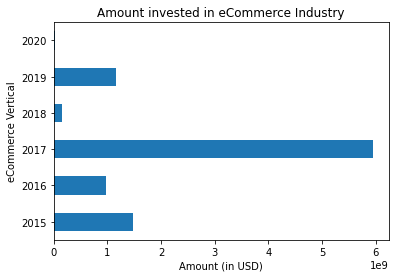

In [122]:
industry_vertical_year_df = industry_vertical_df.get_group("eCommerce").groupby(["funding_year"]).amount.sum().plot.barh()


industry_vertical_year_df.set(ylabel="eCommerce Vertical", xlabel="Amount (in USD)", title="Amount invested in eCommerce Industry")

plt.show()

We can see from the above that the funding sky rocketed into eCommerce in 2017. and suddenly shot down after 2017. This could imply that investors in India might not have seen too much potential in the eCommerce market after giants like Flipkart.com and Amazon India landed up taking a most of market share.

The reason we have such spikes in the data might also be due to the fact that there is not enough data for all years in all industry verticals in this dataset.

As mentioned earlier for many private companies it is very hard to collect data about funding other than from publicly available funding announcements from the company and from news articles like Techcrunch or Yourstory.in. This is because unlike publicly traded companies, private companies are not legally bound to disclose their financials, fund raises, revenues, etc.

## Conclusion
We set out to look for trends and analyse the Indian startup investment space from 2015 - 2020. From our analysis, we can infer that the most common types of funding in the last 5 years from various different types of investors have been **seed** and **private equity** funding. We can also infer that the amount being invested in startups has been going up every year. Hence it is a great time to startup in India at this point in time due to the increase in venture capital.